In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error as MSE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [2]:
np.random.seed(42)

# 1. Import the train datasets

In [3]:
X_train = pd.read_csv("A_Normalised_train_data.csv",index_col=0)
Y_train = pd.read_csv("A_Log_sales_train.csv",index_col=0)

In [4]:
Model_1 = Lasso()

# 2. Setup Pipeline

In [5]:
poly = PolynomialFeatures()
pca=PCA()
SLR = Model_1

In [6]:
# Step 1: Polynomial transform
# Step 2: PCA
# Step 3: Model
pipe = Pipeline(steps=[("poly",poly),("pca",pca),("SLR",SLR)])

In [7]:
param_grid = {
    "pca__n_components": [45, 100 ,150 ,170],
    "poly__degree":[1,2],
    "SLR__alpha":[0.1,0.5,10,100,1000]
}

# 3. Setup GridSearch

In [8]:
score_metric = 'neg_mean_squared_error'
search = GridSearchCV(pipe,param_grid,
                      n_jobs=-1,
                      cv=10,
                      scoring=score_metric)

In [9]:
search.fit(X_train,Y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('poly', PolynomialFeatures()),
                                       ('pca', PCA()), ('SLR', Lasso())]),
             n_jobs=-1,
             param_grid={'SLR__alpha': [0.1, 0.5, 10, 100, 1000],
                         'pca__n_components': [45, 100, 150, 170],
                         'poly__degree': [1, 2]},
             scoring='neg_mean_squared_error')

In [10]:
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=-0.904):
{'SLR__alpha': 0.1, 'pca__n_components': 170, 'poly__degree': 2}


In [11]:
df = pd.DataFrame(search.cv_results_)
df = df.sort_values(by=['rank_test_score'])
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_SLR__alpha,param_pca__n_components,param_poly__degree,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
7,29.877221,9.940889,0.555262,0.277327,0.1,170,2,"{'SLR__alpha': 0.1, 'pca__n_components': 170, ...",-0.730736,-0.704399,...,-0.836007,-0.951710,-0.712901,-0.687536,-0.733554,-0.845728,-0.862190,-0.903505,0.364869,1
4,0.316164,0.196198,0.062700,0.071101,0.1,150,1,"{'SLR__alpha': 0.1, 'pca__n_components': 150, ...",-0.874951,-0.868846,...,-1.065290,-1.092528,-0.740483,-0.833620,-0.884925,-0.940249,-0.910219,-0.935921,0.121012,2
6,0.441266,0.182616,0.055597,0.059419,0.1,170,1,"{'SLR__alpha': 0.1, 'pca__n_components': 170, ...",-0.874951,-0.868846,...,-1.065290,-1.092528,-0.740483,-0.833620,-0.884925,-0.940249,-0.910219,-0.935921,0.121012,2
5,20.330369,10.510443,0.345071,0.276782,0.1,150,2,"{'SLR__alpha': 0.1, 'pca__n_components': 150, ...",-0.754625,-0.745038,...,-0.861089,-0.985865,-0.730318,-0.702133,-0.748165,-0.860785,-0.885062,-0.937208,0.396302,4
2,1.332670,0.370824,0.031249,0.036423,0.1,100,1,"{'SLR__alpha': 0.1, 'pca__n_components': 100, ...",-0.886892,-0.885261,...,-1.063306,-1.116901,-0.755156,-0.855364,-0.906390,-0.951720,-0.942493,-0.941281,0.103370,5
3,26.025424,5.560214,0.557302,0.240217,0.1,100,2,"{'SLR__alpha': 0.1, 'pca__n_components': 100, ...",-0.899132,-0.881393,...,-1.024161,-1.165944,-0.851272,-0.853211,-0.903065,-0.991197,-1.036555,-0.960128,0.095375,6
0,0.347571,0.103413,0.031715,0.023110,0.1,45,1,"{'SLR__alpha': 0.1, 'pca__n_components': 45, '...",-0.909955,-0.913078,...,-1.094300,-1.157989,-0.781128,-0.876735,-0.919286,-0.957322,-0.968757,-0.963608,0.105827,7
11,21.200853,5.905016,0.344978,0.221822,0.5,100,2,"{'SLR__alpha': 0.5, 'pca__n_components': 100, ...",-0.987284,-0.979513,...,-1.196275,-1.262661,-0.876106,-0.978668,-1.005322,-1.044692,-1.150499,-1.051692,0.110971,8
13,24.844540,6.490954,0.530235,0.298034,0.5,150,2,"{'SLR__alpha': 0.5, 'pca__n_components': 150, ...",-0.961751,-0.959354,...,-1.164750,-1.228042,-0.845718,-0.914626,-0.946541,-1.014638,-1.120418,-1.062644,0.176961,9
15,30.086842,5.117430,0.353031,0.225542,0.5,170,2,"{'SLR__alpha': 0.5, 'pca__n_components': 170, ...",-0.962084,-0.960590,...,-1.164672,-1.229304,-0.845746,-0.916456,-0.946103,-1.013711,-1.121440,-1.063250,0.177329,10


# 4. Best Hyperparameter

In [12]:
parms = pd.DataFrame(df['params'])
for i in parms.iloc[0]:
    print(i)

{'SLR__alpha': 0.1, 'pca__n_components': 170, 'poly__degree': 2}


# 5. Evaluate Model $log(Sales)$

In [13]:
best_pca =parms.iloc[0][0]['pca__n_components']
best_degree=parms.iloc[0][0]['poly__degree']
best_alpha=parms.iloc[0][0]['SLR__alpha']

In [14]:
Model_2 = Lasso(alpha=best_alpha)

In [15]:
poly1 = PolynomialFeatures(degree=best_degree)

In [16]:
X_train1,X_test1,Y_train1,Y_test1 = train_test_split(X_train,Y_train,test_size=0.2,random_state=132)


In [17]:
pca1 = PCA(n_components=best_pca)
X_train1 = poly1.fit_transform(X_train1)
pca1.fit(X_train1)
PX_train1 = pca1.transform(X_train1)
SLR1 = Model_2
SLR1.fit(PX_train1,Y_train1)

Lasso(alpha=0.1)

In [18]:
pca2 = PCA(n_components=best_pca)
X_test1=poly1.fit_transform(X_test1)
pca2.fit(X_test1)
PX_test1 = pca2.transform(X_test1)

In [19]:
MSE(SLR1.predict(PX_test1),Y_test1)

1.820395268279714

In [20]:
result = pd.DataFrame(np.exp(Y_test1))

In [21]:
result["Predicted_sales"] = np.exp(SLR1.predict(PX_test1))

In [22]:
MSE(result["sales"],result["Predicted_sales"])

1394.1488799777076

# 5.1 Model using original sales data

In [23]:
Model_3 = Lasso(alpha=best_alpha)

In [24]:
OY_train = pd.read_csv("A_sales_train.csv",index_col=0)

In [25]:
X_train2,X_test2,Y_train2,Y_test2 = train_test_split(X_train,OY_train,test_size=0.2,random_state=132)

In [26]:
pca3 = PCA(n_components=best_pca)
X_train2 = poly1.fit_transform(X_train2)
pca3.fit(X_train2)
PX_train2 = pca3.transform(X_train2)
SLR2 = Model_3
SLR2.fit(PX_train2,Y_train2)

Lasso(alpha=0.1)

In [27]:
pca4 = PCA(n_components=best_pca)
X_test2=poly1.fit_transform(X_test2)
pca4.fit(X_test2)
PX_test2 = pca4.transform(X_test2)

In [28]:
MSE(SLR2.predict(PX_test2),Y_test2)

1710.4282735925942

#### Notably model trained on log(Sales) has lower out-of-sample MSE than model with unmodified Sales

# 6. Inventory Decision

In [29]:
residual = result['sales']-result['Predicted_sales']

In [30]:
Price=20
Cost=12
Salvage=8
Over=Cost - Salvage
Under=Price - Cost
Over, Under

(4, 8)

### QQ plot to explore the distribution of residual

#### Normal Distribution

In [31]:
import scipy.stats as sct

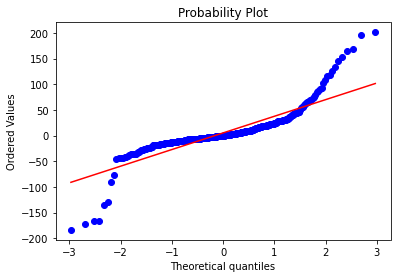

In [32]:
import scipy
scipy.stats.probplot(residual, dist="norm", plot=plt)
plt.show()

In [33]:
s = residual.std()
opt_dec_N=np.ceil(sct.norm.ppf(Under/(Under+Over))*s + result['Predicted_sales'])

#### Exponential Distribution

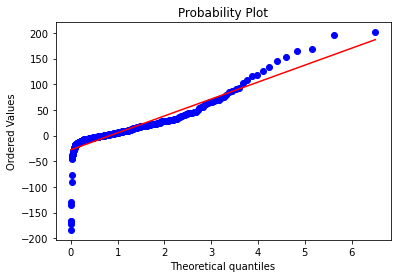

In [34]:
scipy.stats.probplot(residual, dist="expon", plot=plt)
plt.show()

In [35]:
opt_dec_E=np.ceil((-result['Predicted_sales'])*np.log(1-(Under/(Under+Over))))

#### Empirical Distribution

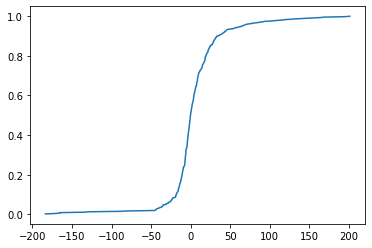

In [36]:
size = residual.shape[0]
step=1/size
jumps = [step*i for i in range(1,size+1)]
Sample = sorted(residual)
plt.plot(Sample,jumps)

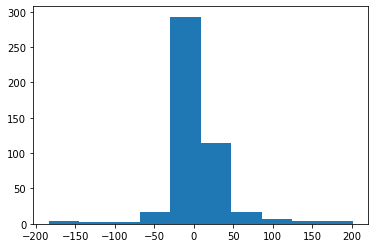

In [37]:
plt.hist(Sample)
plt.show()

In [38]:
def inv(sample,jump,area):
    size = len(sample)
    i=0
    temp=jump[i]
    while temp<area:
        i+=1
        temp=jump[i]
        
    return sample[i]

In [39]:
offset = inv(Sample,jumps,2/3)
offset

7.955729185110005

In [40]:
opt_dec_B = np.ceil(result['Predicted_sales']+offset)

# 7. Out-of-samples Profit

In [41]:
#max profit for test data set
max_profit = result['sales'].sum()*(Price-Cost)
max_profit

82096.0

In [42]:
def profit(demand,inv):
    return (Price-Salvage)*np.minimum(demand,inv)-(Cost-Salvage)*inv

In [43]:
#Profit (None)
profit_lst = profit(round(result['sales']),round(result['Predicted_sales']))
profit_lst.sum()

19900.0

In [44]:
#Profit (Normal)
profit_lst_N = profit(result['sales'],opt_dec_N)
profit_lst_N.sum()

20692.000000000004

In [45]:
#Profit (Exponential)
profit_lst_E = profit(result['sales'],opt_dec_E)
profit_lst_E.sum()

20128.0

In [46]:
#Profit (Empirical)
profit_lst_B = profit(result['sales'],opt_dec_B)
profit_lst_B.sum()

23336.0

# 8. K-Fold Cross Validation

### Repeat steps 5,6,7 with 10-fold cross validation

In [47]:
Model_4=Lasso(alpha=best_alpha)

In [48]:
from sklearn.model_selection import KFold
k=10
kf = KFold(n_splits=k)
X_train_t=X_train.to_numpy()
Y_train_t=Y_train.to_numpy()
model = []
mse_lst = []
max_profit_lst = []
profit_N_lst = []
profit_E_lst = []
profit_B_lst = []

for train_index,test_index in kf.split(X_train_t):
    X_train_K,X_test_K=X_train_t[train_index],X_train_t[test_index]
    Y_train_K,Y_test_K=Y_train_t[train_index],Y_train_t[test_index]
    
    #PCA to transform train data
    pca_K1 = PCA(n_components=best_pca,random_state=42)
    X_train_K = poly1.fit_transform(X_train_K)
    pca_K1.fit(X_train_K)
    PX_train_K = pca_K1.transform(X_train_K)
    
    #Model
    SLR_K = Model_4
    SLR_K.fit(PX_train_K,Y_train_K)
    
    #pca to transform test data
    pca_K2 = PCA(n_components=best_pca,random_state=42)
    X_test_K=poly1.fit_transform(X_test_K)
    pca_K2.fit(X_test_K)
    PX_test_K = pca_K2.transform(X_test_K)
    
    #MSE
    mse_lst.append(MSE(np.exp(SLR_K.predict(PX_test_K)),np.exp(Y_test_K)))
    
    #Transform log(sale) back to sale
    result_K = pd.DataFrame(np.exp(Y_test_K))
    result_K["Predicted_sales"] = np.exp(SLR_K.predict(PX_test_K))
    
    #Obtain residual
    residual_K = result_K[0]-result_K['Predicted_sales']
    
    #Get std for Normal distribution
    s_K = residual_K.std()
    
    #Inventory Decision (Normal)
    opt_dec_N_K=np.ceil(sct.norm.ppf(Under/(Under+Over))*s_K + result_K['Predicted_sales'])
    #Inventory Decision (Exponential)
    opt_dec_E_K=np.ceil((-result_K['Predicted_sales'])*np.log(1-(Under/(Under+Over))))
    
    #Inventory Decision (Empirical Distribution)
    size_K = residual_K.shape[0]
    step_K=1/size_K
    jumps_K = [step_K*i for i in range(1,size_K+1)]
    Sample_K = sorted(residual_K)
    offset_K = inv(Sample_K,jumps_K,2/3)
    opt_dec_B_K = np.ceil(result_K['Predicted_sales']+offset_K)
    
    #Out-of_sample profit
    profit_lst_B_K = profit(result_K[0],opt_dec_B_K)
    profit_B_lst.append(profit_lst_B_K.sum())
    
    profit_lst_N_K = profit(result_K[0],opt_dec_N_K)
    profit_N_lst.append(profit_lst_N_K.sum())
    
    profit_lst_E_K = profit(result_K[0],opt_dec_E_K)
    profit_E_lst.append(profit_lst_E_K.sum())
    
    max_profit_K = result_K[0].sum()*(Price-Cost)
    max_profit_lst.append(max_profit_K)
    
max_profit_lst = np.array(max_profit_lst)
profit_N_lst = np.array(profit_N_lst)
profit_E_lst = np.array(profit_E_lst)
profit_B_lst = np.array(profit_B_lst)

fraction_of_max_N = profit_N_lst/max_profit_lst
fraction_of_max_E = profit_E_lst/max_profit_lst
fraction_of_max_B = profit_B_lst/max_profit_lst

dist_profit = ["Normal","Exponential","Empirical","Max"]
dist_frac = ["Normal","Exponential","Empirical"]
col_name = ["Dataset_"+str(i) for i in range(1,k+1)]

profit_lst = [profit_N_lst,profit_E_lst,profit_B_lst,max_profit_lst]
profit_table = pd.DataFrame(profit_lst,index=dist_profit,columns=col_name)
profit_table["mean_profit"]=profit_table.mean(axis=1)
profit_table["std_profit"]=profit_table.std(ddof=1,axis=1)

fraction_lst = [fraction_of_max_N,fraction_of_max_E,fraction_of_max_B]
fraction_table = pd.DataFrame(fraction_lst,index=dist_frac,columns=col_name)
fraction_table["mean_fraction"]=fraction_table.mean(axis=1)

In [49]:
fraction_table

,Dataset_1,Dataset_2,Dataset_3,Dataset_4,Dataset_5,Dataset_6,Dataset_7,Dataset_8,Dataset_9,Dataset_10,mean_fraction
Normal,0.298473,0.373166,0.174270,0.204120,0.127236,0.338148,0.224473,0.341457,0.322387,0.270169,0.267390
Exponential,0.281655,0.329592,0.206843,0.263262,0.247703,0.313563,0.249632,0.292541,0.331335,0.268824,0.278495
Empirical,0.316161,0.379088,0.244773,0.283691,0.265673,0.361811,0.283859,0.346054,0.365873,0.306857,0.315384


In [50]:
profit_table

,Dataset_1,Dataset_2,Dataset_3,Dataset_4,Dataset_5,Dataset_6,Dataset_7,Dataset_8,Dataset_9,Dataset_10,mean_profit,std_profit
Normal,12352.0,16888.0,8068.0,9512.0,6316.0,13204.0,10992.0,15748.0,14412.0,11252.0,11874.4,3173.448446
Exponential,11656.0,14916.0,9576.0,12268.0,12296.0,12244.0,12224.0,13492.0,14812.0,11196.0,12468.0,1528.263852
Empirical,13084.0,17156.0,11332.0,13220.0,13188.0,14128.0,13900.0,15960.0,16356.0,12780.0,14110.4,1731.201848
Max,41384.0,45256.0,46296.0,46600.0,49640.0,39048.0,48968.0,46120.0,44704.0,41648.0,44966.4,3203.875254


In [51]:
mse_table = pd.DataFrame(mse_lst,index=col_name,columns=['Cross Validation MSE'])
mse_table

,Cross Validation MSE
Dataset_1,989.835425
Dataset_2,1076.024174
Dataset_3,2866.470916
Dataset_4,2763.647377
Dataset_5,4229.380649
Dataset_6,1031.700896
Dataset_7,2514.656441
Dataset_8,1168.494328
Dataset_9,1607.637229
Dataset_10,1340.336156


In [52]:
print(f"Average 10 fold CV MSE:  {float(mse_table.mean())}")

Average 10 fold CV MSE:  1958.818359121314


In [54]:
name = "2.6_Poly_reg_lasso.csv"
mse_table.to_csv(f".\\Model_CV_Result_MSE\\{name}")

In [55]:
f = pd.DataFrame(fraction_table['mean_fraction'])
f = f.transpose().reset_index()
f.to_csv(f".\\Model_CV_Result_Efficiency\\{name}")